# Zipf's Law... or better Murphy's Law

In [3]:
import frequencies_opt as frq #this is a local file with modified exercise5-code
import matplotlib.pyplot as plt

#shakespeare shall be abreviated by shakes
shakes_corpus = "../exercise-5/corpus"
tv_corpus = "corpus"

shakes_frequ = frq.listSortedFrequencies(shakes_corpus, 100)
tv_frequ = frq.listSortedFrequencies(tv_corpus, 100)

<s>Here I calculate the word rank and the respective frequency for shakespeare and the the TV corpus respectively and store the values as seperated lists.

listFrequency(path, number) returns a list of tuples sorted by rank in this manner: [(word, frequency),...].

frequencyTupleListSplit(list, which_list) returns either a list of the first values each of all the tuples stored in a list or of the second values each. To get the first values each which_list must be either "words" or 0, to get the second values each it must be either "frequencies" or 1.

Concatinated together these functions return the aforementioned output.</s>


By trying to solve the problem mentioned in the email, I thought about a way to calculate the frequencies faster and more efficiently. The solution: listSorttedFrequencies(path, number)
```
def listSortedFrequencies(path, number):

    files = traverse_directory(path)
    counts, sum = compute_counts_and_sum(files)
    sorted_counts = sort_counts(counts)

    sorted_frequencies = [(x[1]/sum) for x in sorted_counts[:number]]

    return sorted_frequencies
```

With this short function I was able to replace this bloated code:

In [4]:
def listFrequency(path, number):
    """
    returns a list of tuples sorted by rank
    """
    files = traverse_directory(path)
    counts, sum = compute_counts_and_sum(files)
    sorted_counts = sort_counts(counts)[0]




    sorted_frequencies = [(val[0], val[1] / sum)
                          for val in sorted_counts[:number]]

    return sorted_frequencies



def frequencyTupleListSplit(list, which_list):
    """
    splits words and their frequencies into to lists respectively
    which_list: enter "words" or 0 to return all the words
    which_list: enter "frequencies" or 1 to return all the frequencies
    """
    words = [val[0] for val in list]
    frequencies = [val[1] for val in list]

    if which_list == "words" or which_list == 0:
        return words
    if which_list == "frequencies" or which_list == 1:
        return frequencies

In [9]:
zipf_x = [x for x in range(1, 101)]
zipf_y = [0.1/y for y in zipf_x]
list = [x for x in range(1, 101)]

Here we get the x and y values and plot them afterwards.

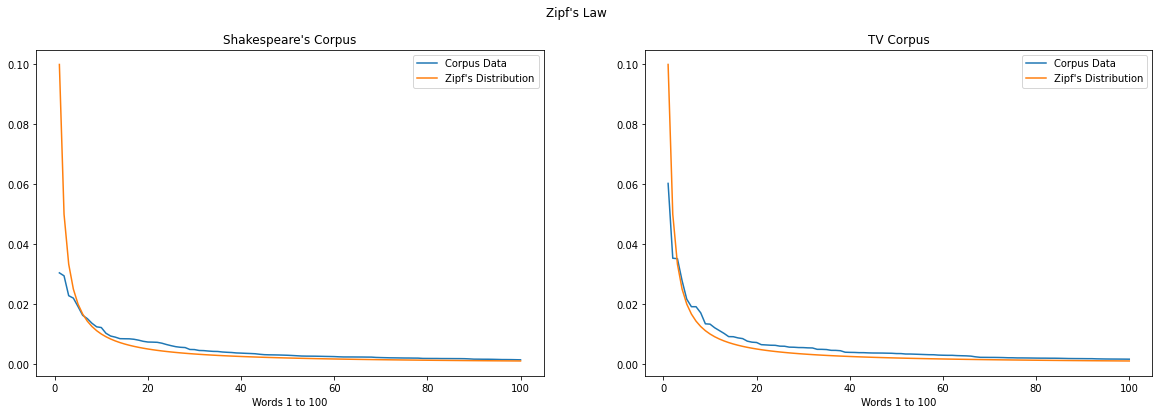

In [10]:
figure, ax = plt. subplots(1, 2, figsize=(20, 6))
figure.suptitle("Zipf's Law")


ax[0].plot(list, shakes_frequ, label="Corpus Data")
ax[0].plot(zipf_x, zipf_y, c="tab:orange", label="Zipf's Distribution")
ax[0].set_title("Shakespeare's Corpus")
ax[0].set_xlabel("Words 1 to 100")
ax[0].legend(loc="best")


ax[1].plot(list, tv_frequ, label="Corpus Data")
ax[1].plot(zipf_x, zipf_y, c="tab:orange", label="Zipf's Distribution")
ax[1].set_title("TV Corpus")
ax[1].set_xlabel("Words 1 to 100")
ax[1].legend(loc="best")


plt.show()


In [ ]:
def tokenize_file(path):
    with open(path, "r") as f:
        complete_string = f.read()
        tokens = []
        normalized_tokens = []
        tokens = complete_string.split()

    for token in tokens:
        normalized_tokens.append(token.lower().strip(",;.!?[]()=-"))

    while ("" in normalized_tokens):
        normalized_tokens.remove("")

Well, I've wasted hours and hours to find the reason why my program would need ages. By comparing my code the other pull requests, I've finally found the problem. Here we have the function that caused all the drama.

In [ ]:
def tokenize_file(path):
    with open(path, "r") as f:
        complete_string = f.read()
        tokens = []
        normalized_tokens = []
        tokens = complete_string.split()

    for token in tokens:
        object = token.lower().strip(",;.!?[]()=-")
        if object != "":
            normalized_tokens.append(object)

By deleting the while-loop and reimplementing it as an if statement, it finally worked. It seems that there is some kind of string in the TV corpus that causes an eternal loop (I've kept the programm open for 4 hours with no output, seems very strange). The funny thing is that the Shakespeare corpus took only 1.5 seconds or something. But seriously, how is this possible?

PS: Why do we need to to use 0.1 in Zipf's Law? Is it just used for scaling purposes or does it bear a deeper meaning?

While being in agony, I still hope you have a nice day and can smile about the fact that it took my 3.5 hours to find a tiny little "disruptor" hidden in two small lines of code. Well, at least I'm now able to even plot my own stupidity.

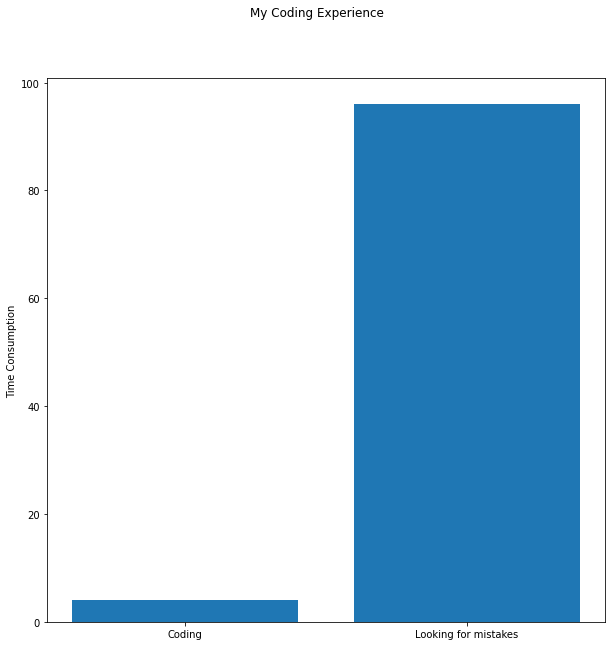

In [29]:
figure, ax = plt. subplots(1, figsize=(10, 10))
figure.suptitle("My Coding Experience")

x = ["Coding", "Looking for mistakes"]
y = [4, 96]

ax.bar(x, y)
ax.set_ylabel("Time Consumption")

plt.show()